In [1]:
import pandas as pd
import scanpy as sc
import anndata
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
import SPACEL
from SPACEL import Splane

In [3]:
adata = sc.read('D:\pythonplaces\deconv-mulST\Baseline\Spoint\Result\Dataset1\st.h5ad')
adata

AnnData object with n_obs × n_vars = 14243 × 880
    obs: 'in_tissue', 'array_row', 'array_col', 'batch_name', 'barcode', 'slice_id', 'layer', 'batch_name_new', 'Istrue', 'n_genes', 'batch', 'Ex_10_L2_4', 'Ex_3_L4_5', 'Oligos_3', 'Astros_2', 'Inhib_2_VIP', 'Ex_5_L5', 'Ex_7_L4_6', 'Inhib_5', 'Mix_5', 'Inhib_6_SST', 'Inhib_1', 'Mix_2', 'Ex_6_L4_6', 'Ex_2_L5', 'OPCs_1', 'Ex_8_L5_6', 'Inhib_7_PVALB', 'Micro/Macro', 'Astros_3', 'Ex_1_L5_6', 'Inhib_3_SST', 'OPCs_2', 'Ex_4_L_6', 'Inhib_8_PVALB', 'Mix_4', 'Astros_1', 'Oligos_1', 'Endo', 'Mix_3', 'Mix_1', 'Ex_9_L5_6', 'Oligos_2', 'Inhib_4_SST'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'celltypes', 'hvg'
    obsm: 'dist_adj', 'spatial'
    layers: 'norm'

In [6]:
adata.uns['celltypes']

array(['Ex_10_L2_4', 'Ex_3_L4_5', 'Oligos_3', 'Astros_2', 'Inhib_2_VIP',
       'Ex_5_L5', 'Ex_7_L4_6', 'Inhib_5', 'Mix_5', 'Inhib_6_SST',
       'Inhib_1', 'Mix_2', 'Ex_6_L4_6', 'Ex_2_L5', 'OPCs_1', 'Ex_8_L5_6',
       'Inhib_7_PVALB', 'Micro/Macro', 'Astros_3', 'Ex_1_L5_6',
       'Inhib_3_SST', 'OPCs_2', 'Ex_4_L_6', 'Inhib_8_PVALB', 'Mix_4',
       'Astros_1', 'Oligos_1', 'Endo', 'Mix_3', 'Mix_1', 'Ex_9_L5_6',
       'Oligos_2', 'Inhib_4_SST'], dtype=object)

In [4]:
adata.obs['batch_name'].unique()

array([151673, 151674, 151675, 151676], dtype=int64)

In [7]:

section_ids = [151673, 151674, 151675, 151676]
adata_list = []

for idx, sid in enumerate(section_ids):
    sub_adata = adata[adata.obs['batch_name'] == sid]
    adata_list.append(sub_adata)

adata_list


[View of AnnData object with n_obs × n_vars = 3611 × 880
     obs: 'in_tissue', 'array_row', 'array_col', 'batch_name', 'barcode', 'slice_id', 'layer', 'batch_name_new', 'Istrue', 'n_genes', 'batch', 'Ex_10_L2_4', 'Ex_3_L4_5', 'Oligos_3', 'Astros_2', 'Inhib_2_VIP', 'Ex_5_L5', 'Ex_7_L4_6', 'Inhib_5', 'Mix_5', 'Inhib_6_SST', 'Inhib_1', 'Mix_2', 'Ex_6_L4_6', 'Ex_2_L5', 'OPCs_1', 'Ex_8_L5_6', 'Inhib_7_PVALB', 'Micro/Macro', 'Astros_3', 'Ex_1_L5_6', 'Inhib_3_SST', 'OPCs_2', 'Ex_4_L_6', 'Inhib_8_PVALB', 'Mix_4', 'Astros_1', 'Oligos_1', 'Endo', 'Mix_3', 'Mix_1', 'Ex_9_L5_6', 'Oligos_2', 'Inhib_4_SST'
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'celltypes', 'hvg'
     obsm: 'dist_adj', 'spatial'
     layers: 'norm',
 View of AnnData object with n_obs × n_vars = 3635 × 880
     obs: 'in_tissue', 'array_row', 'array_col', 'batch_name', 'barcode', 'slice_id', 'layer', 'batch_name_new', 'Istrue', 'n_genes', 'batch', 'Ex_10_L2_4', 'Ex_3_L4_5

In [18]:
import importlib
import base_model

importlib.reload(base_model)

splane_model = Splane.init_model(adata_list, n_clusters=7,use_gpu=False,n_neighbors=8,k=1,gnn_dropout=0.5) 
splane_model.train(d_l=0.5)
splane_model.identify_spatial_domain()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\Anaconda3\envs\Spoint\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_7832\3336256358.py", line 6, in <module>
    splane_model = Splane.init_model(adata_list, n_clusters=7,use_gpu=False,n_neighbors=8,k=1,gnn_dropout=0.5)
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_7832\3336256358.py", line 6, in <module>
    splane_model = Splane.init_model(adata_list, n_clusters=7,use_gpu=False,n_neighbors=8,k=1,gnn_dropout=0.5)
  File "_pydevd_bundle\pydevd_cython_win32_39_64.pyx", line 1179, in _pydevd_bundle.pydevd_cython_win32_39_64.SafeCallWrapper.__call__
  File "_pydevd_bundle\pydevd_cython_win32_39_64.pyx", line 620, in _pydevd_bundle.pydevd_cython_win32_39_64.PyDBFrame.trace_dispatch
  File "_pydevd_bundle\pydevd_cython_win32_39_64.pyx", line 929, in _pydevd_bundle.pydevd_cython_win32_39_64.PyDBFrame.trace_di

In [19]:
stdata=sc.read_h5ad('D:\pythonplaces\SPACEL-main\SPACEL\Splane\Result\DLPFC\DLPFC_st.h5ad')
stdata

AnnData object with n_obs × n_vars = 14243 × 880
    obs: 'in_tissue', 'array_row', 'array_col', 'batch_name', 'barcode', 'slice_id', 'layer', 'batch_name_new', 'Istrue', 'n_genes', 'batch', 'Ex_10_L2_4', 'Ex_3_L4_5', 'Oligos_3', 'Astros_2', 'Inhib_2_VIP', 'Ex_5_L5', 'Ex_7_L4_6', 'Inhib_5', 'Mix_5', 'Inhib_6_SST', 'Inhib_1', 'Mix_2', 'Ex_6_L4_6', 'Ex_2_L5', 'OPCs_1', 'Ex_8_L5_6', 'Inhib_7_PVALB', 'Micro/Macro', 'Astros_3', 'Ex_1_L5_6', 'Inhib_3_SST', 'OPCs_2', 'Ex_4_L_6', 'Inhib_8_PVALB', 'Mix_4', 'Astros_1', 'Oligos_1', 'Endo', 'Mix_3', 'Mix_1', 'Ex_9_L5_6', 'Oligos_2', 'Inhib_4_SST', 'spatial_domain'
    obsm: 'dist_adj', 'spatial'
    layers: 'norm'

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\Anaconda3\envs\Spoint\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_7832\3148407143.py", line 17, in <module>
    sc.pl.umap(sub_adata_tmp, color=['batch_name_new','layer','domain','mclust'], show=True, size=25, save=False)
  File "D:\Anaconda3\envs\Spoint\lib\site-packages\scanpy\plotting\_tools\scatterplots.py", line 674, in umap
    return embedding(adata, 'umap', **kwargs)
  File "D:\Anaconda3\envs\Spoint\lib\site-packages\scanpy\plotting\_tools\scatterplots.py", line 259, in embedding
    color_source_vector = _get_color_source_vector(
  File "D:\Anaconda3\envs\Spoint\lib\site-packages\scanpy\plotting\_tools\scatterplots.py", line 1180, in _get_color_source_vector
    values = adata.obs_vector(value_to_plot, layer=layer)
  File "D:\Anaconda3\envs\Spoint\lib\site-packages\anndata\_core\anndata.py", line 

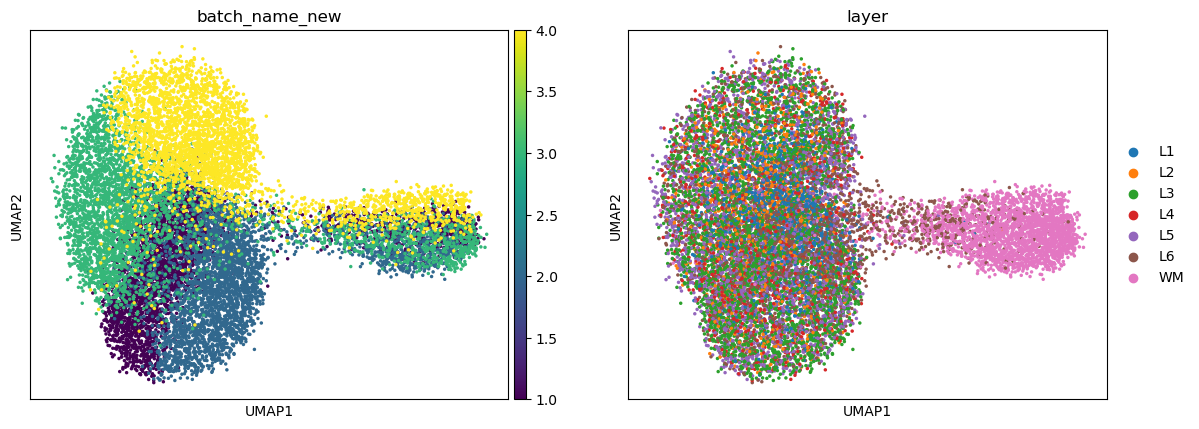

In [24]:
import anndata as ad
import numpy as np
from sklearn.cluster import KMeans
def Kmeans_cluster(adata, num_cluster,  key_added_pred="G3STNET", random_seed=2024):
    np.random.seed(random_seed)
    cluster_model = KMeans(n_clusters=num_cluster, init='k-means++', n_init=100, max_iter=1000, tol=1e-6)
    cluster_labels = cluster_model.fit_predict(adata.X)
    adata.obs[key_added_pred] = cluster_labels
    adata.obs[key_added_pred] = adata.obs[key_added_pred].astype('int')
    adata.obs[key_added_pred] = adata.obs[key_added_pred].astype('category')
    return adata
adata_clu = Kmeans_cluster(stdata, num_cluster=7,  key_added_pred='mclust', random_seed=42)
sub_adata_tmp=adata_clu
sub_adata_tmp.obsm['latent_no_batch']=adata_clu.X
sc.pp.neighbors(sub_adata_tmp, use_rep='latent_no_batch', metric='cosine')
sc.tl.umap(sub_adata_tmp)
sc.pl.umap(sub_adata_tmp, color=['batch_name_new','layer','domain','mclust'], show=True, size=25, save=False)